#  "" Author: Partho Adhikari ""
## Topic: Parse a json file, read the objects and build a regression model using sci-kit learn.

###  Dataset: Iris data

# 1. Load and read the json file

In [44]:
import json
import pandas as pd
import numpy as np

In [73]:
# Opening JSON file
f = open("/home/parth/Downloads/Internship assignment/DS_test/algoparams_from_ui.json")
print(type(f))

<class '_io.TextIOWrapper'>


In [74]:
# returns JSON object as a dictionary
data = json.load(f)
print(type(data))

<class 'dict'>


In [77]:
data.keys()

dict_keys(['session_name', 'session_description', 'design_state_data'])

In [22]:
print(json.dumps(data, indent=4, sort_keys=True))

{
    "design_state_data": {
        "algorithms": {
            "DecisionTreeClassifier": {
                "is_selected": false,
                "max_depth": 7,
                "min_depth": 4,
                "min_samples_per_leaf": [
                    12,
                    6
                ],
                "model_name": "Decision Tree",
                "use_best": true,
                "use_entropy": true,
                "use_gini": false,
                "use_random": true
            },
            "DecisionTreeRegressor": {
                "is_selected": false,
                "max_depth": 7,
                "min_depth": 4,
                "min_samples_per_leaf": [
                    12,
                    6
                ],
                "model_name": "Decision Tree",
                "use_best": true,
                "use_entropy": true,
                "use_gini": false,
                "use_random": true
            },
            "ElasticNetRegression": {
      

## Parsing the nested "target" object

In [82]:
data['design_state_data']['target']

{'prediction_type': 'Regression',
 'target': 'petal_width',
 'type': 'regression',
 'partitioning': True}

In [83]:
data['design_state_data']['feature_handling']

{'sepal_length': {'feature_name': 'sepal_length',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': 'Average of values',
   'impute_value': 0}},
 'sepal_width': {'feature_name': 'sepal_width',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': 'custom',
   'impute_value': -1}},
 'petal_length': {'feature_name': 'petal_length',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': '

# 2. Converting the json file into pandas dataframe

In [118]:
df= pd.read_json("/home/parth/Downloads/Internship assignment/DS_test/algoparams_from_ui.json")

In [119]:
df.shape

(11, 3)

In [120]:
df.head(10)

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_reduction,test,test,"{'feature_reduction_method': 'Tree-based', 'nu..."
hyperparameters,test,test,"{'stratergy': 'Grid Search', 'shuffle_grid': T..."
metrics,test,test,"{'optomize_model_hyperparameters_for': 'AUC', ..."
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid - ...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, algorithms to weighting_stratergy
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   session_name         11 non-null     object
 1   session_description  11 non-null     object
 2   design_state_data    11 non-null     object
dtypes: object(3)
memory usage: 352.0+ bytes


In [122]:
df.describe()

,session_name,session_description,design_state_data
count,11,11,11
unique,1,1,11
top,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
freq,11,11,1


# 2. Importing iris dataset into pandas dataframe

In [123]:
data= pd.read_csv("/home/parth/Downloads/Internship assignment/DS_test/iris.csv")

In [124]:
data.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [125]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [126]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
data.isnull

<bound method DataFrame.isnull of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [128]:
data.shape

(150, 5)

In [129]:
X = data.iloc[:,:-4].values    #independent variable array
Y = data.iloc[:,3].values      #dependent variable vector

In [130]:
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [131]:
print(Y)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [132]:
Y=Y.reshape(-1,1)

In [133]:
print(Y)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

# 3. Model selection

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=5)

In [186]:
rf = RandomForestRegressor(n_estimators = 20,
                           max_features = 'log2',
                           min_samples_leaf= 5,
                           max_depth = 25,
                           random_state = 0)

In [187]:
import datetime

#Start time
print(datetime.datetime.now())

rf.fit(X_train, Y_train)

#End time
print(datetime.datetime.now())

2022-08-26 15:59:46.690275
2022-08-26 15:59:46.740149


/tmp/ipykernel_17272/53223869.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


# 4. Model Evaluation

In [188]:
Y_pred = rf.predict(Y_test)

In [189]:
print('R Squared: {:.4f}'.format(rf.score(X,Y)*100))

R Squared: 74.0335


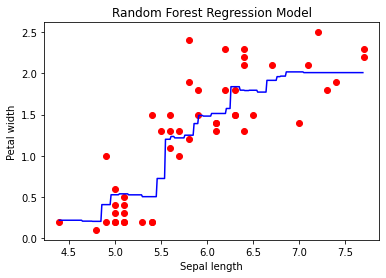

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Visualising the Random Forest Regression results
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_grid, rf.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.show()